# All details of dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving new_dataset.csv to new_dataset (2).csv


In [ ]:
# All the necessary imports for classification
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import (accuracy_score, classification_report,
confusion_matrix, f1_score)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dataset = pd.read_csv("new_dataset.csv")

In [ ]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
dataset = dataset.dropna(subset=['bmi'])

In [ ]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Splitting into training and test data


In [ ]:
#split dataset in features and target variable
feature_cols = ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
X = dataset[feature_cols] # Features
y = dataset.stroke # Target variable


In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


# Decision Tree


In [1]:
#Train the Classification model on the Training set
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


NameError: ignored

In [ ]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)


Accuracy: 92.39646978954514
Confusion Matrix:
 [[1350   59]
 [  53   11]]


# **Naive Bayes**

In [ ]:
#Model building and training
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train);

In [ ]:
#Model Evaluation
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)*100
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

labels = [0,1]
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

Accuracy: 93.346911065852
F1 Score: 0.9355926372751519
Confusion Matrix:
 [[1364   45]
 [  53   11]]


# Visualization

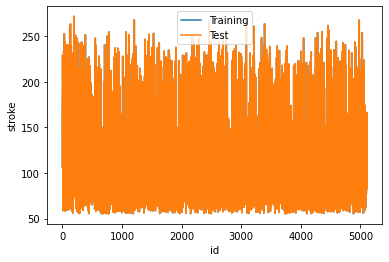

In [ ]:
import matplotlib.pyplot as plt

# Plot a line graph of the ratings in the training dataset
plt.plot(dataset.index, dataset['avg_glucose_level'], label='Training')

# Plot a line graph of the ratings in the test dataset
plt.plot(dataset.index, dataset['avg_glucose_level'], label='Test')

# Add a legend and labels to the plot
plt.legend()
plt.xlabel('id')
plt.ylabel('stroke')

# Show the plot
plt.show()

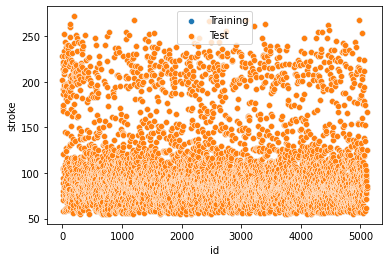

In [ ]:
# Plot a scatterplot of the avg_glucose_level in the training dataset
sns.scatterplot(x=dataset.index, y='avg_glucose_level', data=dataset, label='Training')

# Plot a scatterplot of the avg_glucose_level in the test dataset
sns.scatterplot(x=dataset.index, y='avg_glucose_level', data=dataset, label='Test')

# Add a legend and labels to the plot
plt.legend()
plt.xlabel('id')
plt.ylabel('stroke')

# Show the plot
plt.show()

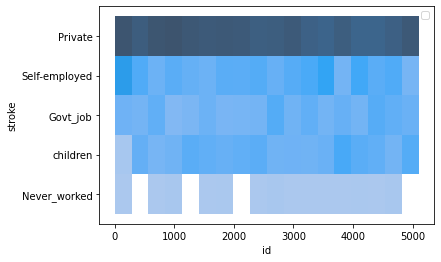

In [ ]:


# Plot a histplot of the avg_glucose_level in the training dataset
sns.histplot(x=dataset.index, y='work_type', data=dataset, label='Training')

# Plot a histplot of the avg_glucose_level in the test dataset
sns.histplot(x=dataset.index, y='work_type', data=dataset, label='Test')

# Add a legend and labels to the plot
plt.legend()
plt.xlabel('id')
plt.ylabel('stroke')

# Show the plot
plt.show()
